<a href="https://colab.research.google.com/github/Jaswithagadde/internship/blob/main/StockPriceTrendPredictionWithLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance pandas numpy matplotlib scikit-learn tensorflow


In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [3]:
ticker = 'AAPL'
data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
data = data[['Close']]
data.head()

/tmp/ipython-input-3-471088857.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288588
2015-01-05,23.604340
2015-01-06,23.606556
2015-01-07,23.937569
2015-01-08,24.857307


In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

X.shape, y.shape

((2455, 60, 1), (2455, 1))

In [5]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - loss: 0.0124 - val_loss: 6.4829e-04
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - loss: 9.0112e-04 - val_loss: 9.6748e-04
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 9.6696e-04 - val_loss: 0.0037
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 8.4896e-04 - val_loss: 0.0032
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 8.0928e-04 - val_loss: 6.6183e-04
Epoch 9/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 8.0035e-04 - val_loss: 0.0013
Epoch 10/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 7.2690e-04 - val_loss: 8.5141e-04
Epoch 11/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 7.6757e-04 - val_loss: 0.0018
Epoch 12/20
62/62 ━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step


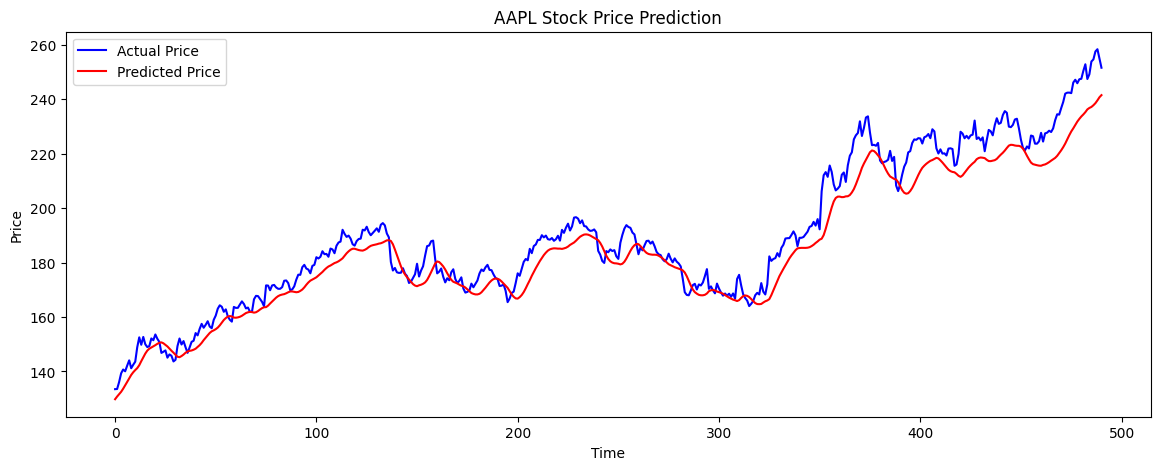

In [6]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label='Actual Price', color='blue')
plt.plot(predicted_prices, label='Predicted Price', color='red')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


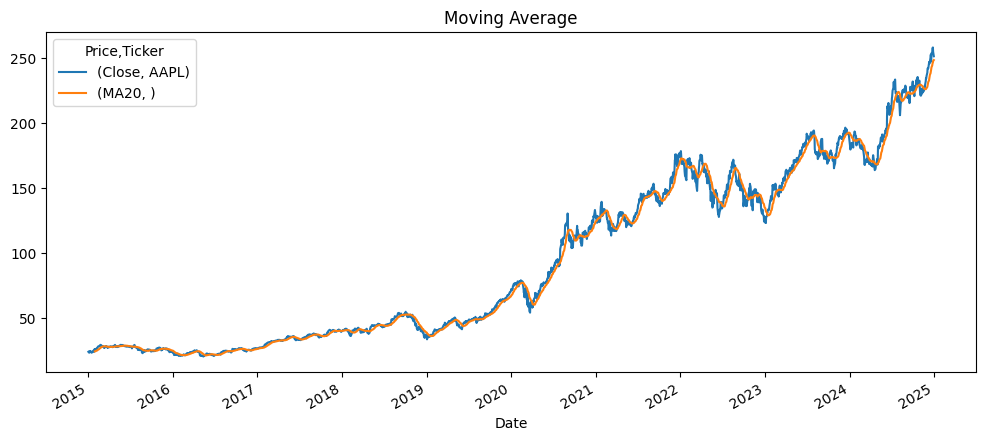

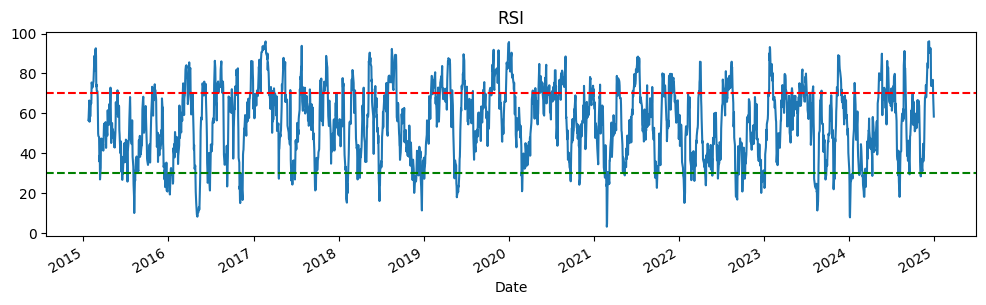

In [7]:
data['MA20'] = data['Close'].rolling(window=20).mean()

def compute_rsi(series, period=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

data['RSI'] = compute_rsi(data['Close'])

data[['Close', 'MA20']].plot(figsize=(12, 5), title='Moving Average')
plt.show()

data['RSI'].plot(figsize=(12, 3), title='RSI')
plt.axhline(70, color='r', linestyle='--')
plt.axhline(30, color='g', linestyle='--')
plt.show()